In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [301]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [302]:
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [303]:
test.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [304]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
ID        107833 non-null object
DATOP     107833 non-null object
FLTID     107833 non-null object
DEPSTN    107833 non-null object
ARRSTN    107833 non-null object
STD       107833 non-null object
STA       107833 non-null object
STATUS    107833 non-null object
AC        107833 non-null object
target    107833 non-null float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [305]:
def points(row):
    return row.replace("." , ":")

In [306]:
train.STA = train.STA.apply(points)
test.STA = test.STA.apply(points)

In [307]:
train.DATOP = train.DATOP.replace("." , ":")
train.STD = train.STD.replace("." , ":")
train.STA = train.STA.replace("." , ":")

In [308]:
test.STA = test.STA.replace("." , ":")

In [309]:
test.DATOP = pd.to_datetime(test.DATOP)
test.STD = pd.to_datetime(test.STD)
test.STA = pd.to_datetime(test.STA)

train.DATOP = pd.to_datetime(train.DATOP)
train.STD = pd.to_datetime(train.STD)
train.STA = pd.to_datetime(train.STA)

In [310]:
train['day'] = train.DATOP.dt.day
train['month'] = train.DATOP.dt.month
train['year'] = train.DATOP.dt.year
train['daydep'] = train.STD.dt.day
train['dayarr'] = train.STA.dt.day

test['day'] = test.DATOP.dt.day
test['month'] = test.DATOP.dt.month
test['year'] = test.DATOP.dt.year
test['daydep'] = test.STD.dt.day
test['dayarr'] = test.STA.dt.day

In [311]:
test['sta_hour'] = test.STA.dt.hour
test['sta_minute'] = test.STA.dt.minute

train['sta_hour'] = train.STA.dt.hour
train['sta_minute'] = train.STA.dt.minute

test['std_hour'] = test.STD.dt.hour
test['std_minute'] = test.STD.dt.minute

train['std_hour'] = train.STD.dt.hour
train['std_minute'] = train.STD.dt.minute

In [312]:
train['hr_sin_sta'] = np.sin(train['sta_hour']*(2.*np.pi/24))
train['hr_cos_sta'] = np.cos(train['sta_hour']*(2.*np.pi/24))
train['mn_sin_sta'] = np.sin(train['sta_minute']*(2.*np.pi/60))
train['mn_cos_sta'] = np.cos(train['sta_minute']*(2.*np.pi/60))

train['hr_sin_std'] = np.sin(train['std_hour']*(2.*np.pi/24))
train['hr_cos_std'] = np.cos(train['std_hour']*(2.*np.pi/24))
train['mn_sin_std'] = np.sin(train['std_minute']*(2.*np.pi/60))
train['mn_cos_std'] = np.cos(train['std_minute']*(2.*np.pi/60))

test['hr_sin_sta'] = np.sin(test['sta_hour']*(2.*np.pi/24))
test['hr_cos_sta'] = np.cos(test['sta_hour']*(2.*np.pi/24))
test['mn_sin_sta'] = np.sin(test['sta_minute']*(2.*np.pi/60))
test['mn_cos_sta'] = np.cos(test['sta_minute']*(2.*np.pi/60))

test['hr_sin_std'] = np.sin(test['std_hour']*(2.*np.pi/24))
test['hr_cos_std'] = np.cos(test['std_hour']*(2.*np.pi/24))
test['mn_sin_std'] = np.sin(test['std_minute']*(2.*np.pi/60))
test['mn_cos_std'] = np.cos(test['std_minute']*(2.*np.pi/60))

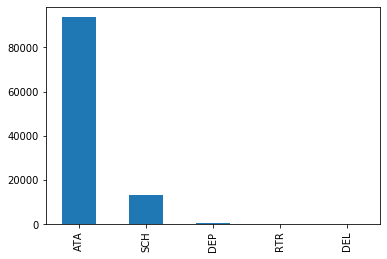

In [313]:
train.STATUS.value_counts().plot(kind = 'bar')

In [314]:
def status_rare(row):
    if row != "ATA" and row != "SCH":
        return "Other"
    else:
        return row

In [315]:
train.STATUS = train.STATUS.apply(status_rare)
test.STATUS = test.STATUS.apply(status_rare)

In [142]:
"""train.STATUS = np.where(train.STATUS == "ATA" , 1, 0)
test.STATUS = np.where(test.STATUS == "ATA" , 1, 0)"""

In [316]:
train['total_time'] = pd.to_datetime((train.STA - train.STD)).dt.hour * 60+ pd.to_datetime((train.STA - train.STD)).dt.minute

C:\Users\MxcsYounes\.conda\envs\base_ml\lib\site-packages\pandas\util\_decorators.py:208: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  return func(*args, **kwargs)


In [317]:
test['total_time'] = pd.to_datetime((test.STA - test.STD)).dt.hour * 60+ pd.to_datetime((test.STA - test.STD)).dt.minute

In [318]:
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,...,std_minute,hr_sin_sta,hr_cos_sta,mn_sin_sta,mn_cos_sta,hr_sin_std,hr_cos_std,mn_sin_std,mn_cos_std,total_time
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,...,30,1.224647e-16,-1.000000e+00,-0.500000,8.660254e-01,0.500000,-0.866025,1.224647e-16,-1.000000,145
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,...,5,-8.660254e-01,-5.000000e-01,-0.500000,8.660254e-01,-0.707107,-0.707107,5.000000e-01,0.866025,110
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,...,10,1.000000e+00,6.123234e-17,-1.000000,-1.836970e-16,0.866025,0.500000,8.660254e-01,0.500000,155
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,...,10,-9.659258e-01,-2.588190e-01,0.000000,1.000000e+00,-0.500000,-0.866025,8.660254e-01,0.500000,170
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,...,30,-7.071068e-01,-7.071068e-01,-0.866025,5.000000e-01,-0.500000,-0.866025,1.224647e-16,-1.000000,80


In [319]:
['TUN', 'DJE', 'ORY', 'MIR', 'MRS', 'LYS', 'NCE', 'ALG', 'MXP', 'IST']

['TUN', 'DJE', 'ORY', 'MIR', 'MRS', 'LYS', 'NCE', 'ALG', 'MXP', 'IST']

In [320]:
train['same_city'] = np.where(train['DEPSTN'] == train['ARRSTN'] ,1 ,0)
test['same_city'] = np.where(test['DEPSTN'] == test['ARRSTN'] ,1 ,0)

In [321]:
def extract_plan_hi(row):
    return row.split(" ")[1][:3]

In [322]:
def extract_plan(row):
    return row.split(" ")[0]

In [323]:
train['airplane_type'] = train['AC'].apply(extract_plan_hi)
test['airplane_type'] = test['AC'].apply(extract_plan_hi)

In [324]:
train['airplane_city'] = train['AC'].apply(extract_plan)
test['airplane_city'] = test['AC'].apply(extract_plan)

In [325]:
train['airplane_city'] = np.where(train['airplane_city'] == 'TU', 1, 0)
test['airplane_city'] = np.where(test['airplane_city'] == 'TU', 1, 0)

In [326]:
train['airplane_type'].value_counts().index

Index(['32A', '320', '736', '31B', 'AT7', '332', 'CR9', '31A', '733', '734',
       '738', '343', '319', '345', 'M87', '321'],
      dtype='object')

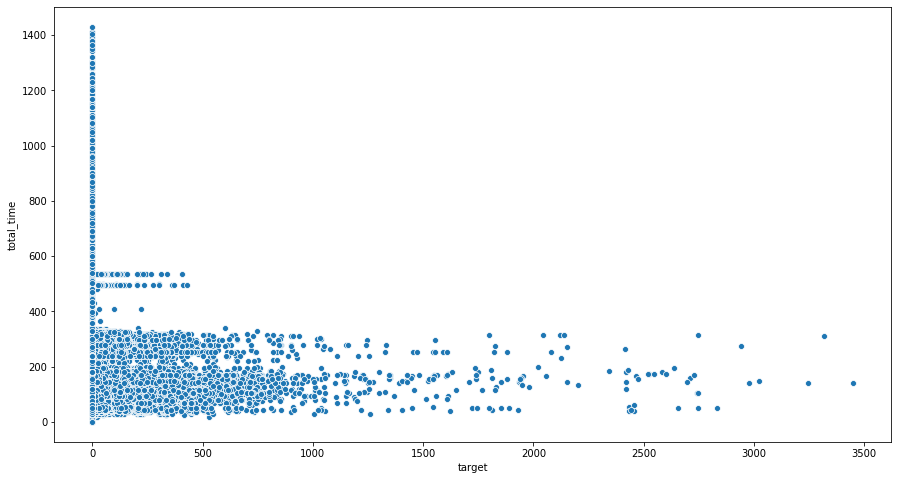

In [23]:
plt.figure(figsize = (15 , 8))
sns.scatterplot(x = 'target' , y = 'total_time' , data = train)

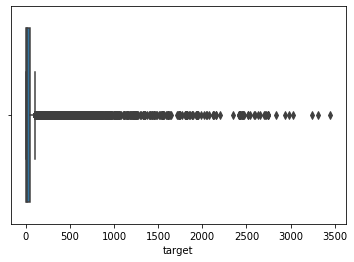

In [523]:
sns.boxplot(train.target)

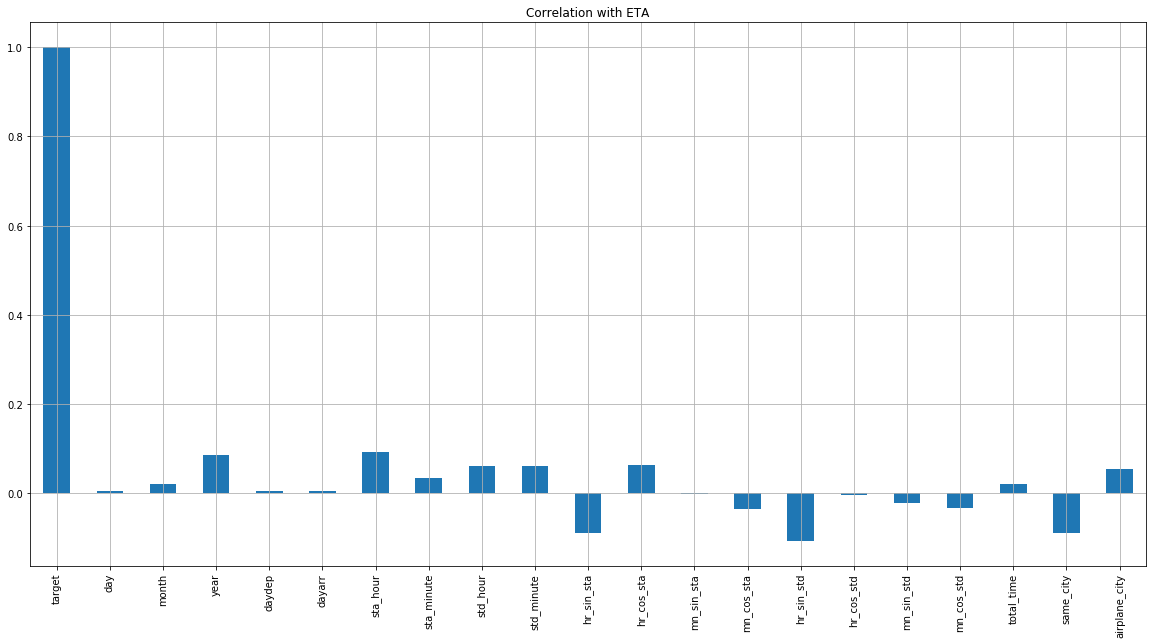

In [327]:
train.corrwith(train['target']).plot.bar(figsize = (20,10), grid = True, title = 'Correlation with ETA')

In [328]:
def city_other(row):
    if row not in ['TUN', 'DJE', 'ORY', 'MIR', 'MRS', 'LYS', 'NCE', 'ALG', 'MXP', 'IST']:
        return "Other"
    else:
        return row

In [329]:
test.DEPSTN = test.DEPSTN.apply(city_other)
train.DEPSTN = train.DEPSTN.apply(city_other)
test.ARRSTN = test.ARRSTN.apply(city_other)
train.ARRSTN = train.ARRSTN.apply(city_other)

In [330]:
test.DEPSTN.value_counts()

TUN      3621
Other    2681
DJE       926
ORY       574
MIR       522
MRS       243
NCE       192
LYS       191
ALG       129
MXP       129
IST       125
Name: DEPSTN, dtype: int64

In [28]:
train.isnull().sum()

ID               0
DATOP            0
FLTID            0
DEPSTN           0
ARRSTN           0
STD              0
STA              0
STATUS           0
AC               0
target           0
day              0
month            0
year             0
daydep           0
dayarr           0
sta_hour         0
sta_minute       0
std_hour         0
std_minute       0
total_time       0
same_city        0
airplane_type    0
airplane_city    0
dtype: int64

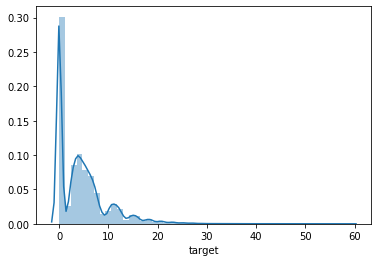

In [289]:
sns.distplot(train.target.transform(np.sqrt))

In [604]:
(train.target == 0).sum()

38168

In [331]:
trainset = train.drop(['ID' , 'DATOP' , 'FLTID' , 'STD' , 'STA' , 'AC'] , axis = 1)
testset = test.drop(['ID' , 'DATOP' , 'FLTID' , 'STD' , 'STA', 'AC'] , axis = 1)

In [291]:
#trainset = trainset[trainset['target'] != 0]

In [332]:
all_ = pd.concat([trainset.drop(['target'], axis = 1), testset])

In [333]:
all_data = pd.get_dummies(all_)

In [334]:
Xt = all_data.iloc[:trainset.shape[0],:]
Xts = all_data.iloc[trainset.shape[0]:,:]

In [209]:
trainset.head()

,DEPSTN,ARRSTN,STATUS,target,day,month,year,daydep,dayarr,sta_hour,...,mn_sin_sta,mn_cos_sta,hr_sin_std,hr_cos_std,mn_sin_std,mn_cos_std,total_time,same_city,airplane_type,airplane_city
0,Other,TUN,ATA,260.0,3,1,2016,3,3,12,...,-0.500000,8.660254e-01,0.500000,-0.866025,1.224647e-16,-1.000000,145,0,32A,1
1,MXP,TUN,ATA,20.0,13,1,2016,13,13,16,...,-0.500000,8.660254e-01,-0.707107,-0.707107,5.000000e-01,0.866025,110,0,31B,1
2,TUN,IST,ATA,0.0,16,1,2016,16,16,6,...,-1.000000,-1.836970e-16,0.866025,0.500000,8.660254e-01,0.500000,155,0,32A,1
3,DJE,Other,ATA,0.0,17,1,2016,17,17,17,...,0.000000,1.000000e+00,-0.500000,-0.866025,8.660254e-01,0.500000,170,0,736,1
4,TUN,ALG,ATA,22.0,17,1,2016,17,17,15,...,-0.866025,5.000000e-01,-0.500000,-0.866025,1.224647e-16,-1.000000,80,0,320,1


In [335]:
X = Xt.copy()
y = trainset.target

In [555]:
"""X = trainset.drop(['target'], axis = 1)
y = trainset.target"""

In [306]:
for c in X.columns:
    col_type = X[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        X[c] = X[c].astype('category')

In [336]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 70)

In [337]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [338]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(x_test)
np.sqrt(mean_squared_error(y_pred , y_test))

119.42818207543725

In [108]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

C:\Users\MxcsYounes\.conda\envs\base_ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [109]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(x_test)
np.sqrt(mean_squared_error(y_pred , y_test))

125.33770960272689

In [239]:
x_train.columns

Index(['day', 'month', 'year', 'daydep', 'dayarr', 'sta_hour', 'sta_minute',
       'std_hour', 'std_minute', 'hr_sin_sta', 'hr_cos_sta', 'mn_sin_sta',
       'mn_cos_sta', 'hr_sin_std', 'hr_cos_std', 'mn_sin_std', 'mn_cos_std',
       'total_time', 'same_city', 'airplane_city', 'DEPSTN_ALG', 'DEPSTN_DJE',
       'DEPSTN_IST', 'DEPSTN_LYS', 'DEPSTN_MIR', 'DEPSTN_MRS', 'DEPSTN_MXP',
       'DEPSTN_NCE', 'DEPSTN_ORY', 'DEPSTN_Other', 'DEPSTN_TUN', 'ARRSTN_ALG',
       'ARRSTN_DJE', 'ARRSTN_IST', 'ARRSTN_LYS', 'ARRSTN_MIR', 'ARRSTN_MRS',
       'ARRSTN_MXP', 'ARRSTN_NCE', 'ARRSTN_ORY', 'ARRSTN_Other', 'ARRSTN_TUN',
       'STATUS_ATA', 'STATUS_DEL', 'STATUS_DEP', 'STATUS_RTR', 'STATUS_SCH',
       'airplane_type_319', 'airplane_type_31A', 'airplane_type_31B',
       'airplane_type_320', 'airplane_type_321', 'airplane_type_32A',
       'airplane_type_332', 'airplane_type_343', 'airplane_type_345',
       'airplane_type_733', 'airplane_type_734', 'airplane_type_736',
       'airplane_type_7

In [618]:
from xgboost import XGBRegressor
reg = XGBRegressor(objective = 'reg:squarederror')
reg.fit(x_train, y_train)

C:\Users\MxcsYounes\.conda\envs\base_ml\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [619]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(x_test)
np.sqrt(mean_squared_error(y_pred , y_test))

4.9633736572845075

In [339]:
params = {
    'application': 'binary', # for binary classification
#     'num_class' : 1, # used for multi-classes
    'boosting': 'gbdt', # traditional gradient boosting decision tree
    'num_iterations': 100, 
    'learning_rate': 0.05,
    'num_leaves': 62,
    'device': 'cpu', # you can use GPU to achieve faster learning
    'max_depth': -1, # <0 means no limit
    'max_bin': 510, # Small number of bins may reduce training accuracy but can deal with over-fitting
    'lambda_l1': 5, # L1 regularization
    'lambda_l2': 10, # L2 regularization
    'metric' : 'binary_error',
    'subsample_for_bin': 200, # number of samples for constructing bins
    'subsample': 1, # subsample ratio of the training instance
    'colsample_bytree': 0.8, # subsample ratio of columns when constructing the tree
    'min_split_gain': 0.5, # minimum loss reduction required to make further partition on a leaf node of the tree
    'min_child_weight': 1, # minimum sum of instance weight (hessian) needed in a leaf
    'min_child_samples': 5# minimum number of data needed in a leaf
}

In [340]:
from lightgbm import LGBMRegressor
reg = LGBMRegressor(boosting_type= 'gbdt', 
          objective = 'binary', 
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'], 
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'], 
          min_split_gain = params['min_split_gain'], 
          min_child_weight = params['min_child_weight'], 
          min_child_samples = params['min_child_samples'])
reg.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_bin=510,
              max_depth=-1, min_child_samples=5, min_child_weight=1,
              min_split_gain=0.5, n_estimators=100, n_jobs=5, num_leaves=31,
              objective='binary', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1, subsample_for_bin=200,
              subsample_freq=0)

In [341]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(x_test)
np.sqrt(mean_squared_error(y_pred , y_test))

132.24857493065238

In [216]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(LGBMRegressor(), X, y, cv=10 , scoring = 'neg_mean_squared_error')

In [217]:
result

array([ -6884.60332643,  -7679.30562061,  -6855.27287246, -14196.28810992,
       -14790.59084706, -17507.11102552,  -5481.27196216, -17697.36199152,
       -16806.48000532, -15266.72962981])

In [218]:
np.sqrt(np.abs(result.mean()))

110.97973481263232

In [107]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimator': [10,50,100,150, 200 , 400 , 600, 1000]}

# Iny_testitialize XGB and GridSearch

grid = GridSearchCV(LGBMRegressor(), params ,n_jobs = -1, verbose=True, cv = 5,scoring = 'neg_mean_squared_error' )
grid.fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   52.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimator': [10, 50, 100, 150, 200, 400, 600,
                                         1000]},
             pre_dispatch='2*n_jobs', refit=True,

In [108]:
print(grid.best_score_)
print(grid.best_params_)

-12464.215946215716
{'n_estimator': 10}


In [224]:
def above(x):
    if x < 20:
        return 0
    else:
        return x

In [56]:
resu = pd.DataFrame({"Pred" : y_pred , "Test":y_test})

In [58]:
aa = resu.Pred.apply(above).values

In [50]:
resu[resu['Test'] < 10].sort_values("Pred")

,Pred,Test
107433,-22.889500,0.0
103728,-19.592866,0.0
70616,-19.281737,0.0
69541,-18.421496,0.0
105021,-18.062263,0.0
...,...,...
78773,236.521921,0.0
63329,277.209225,0.0
85589,283.180197,0.0
85579,286.852099,0.0


In [310]:
for c in testset.columns:
    col_type = testset[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        testset[c] = testset[c].astype('category')

In [230]:
result = reg.predict(Xts)

In [231]:
orders = test.ID
all_data = list(zip(orders, result.reshape(1,-1)[0].astype('float32')))

In [232]:
final_result = pd.DataFrame(all_data, columns=['ID', 'target'])
final_result.head()

,ID,target
0,test_id_0,17.545910
1,test_id_1,31.620743
2,test_id_2,29.483791
3,test_id_3,16.649971
4,test_id_4,44.697678


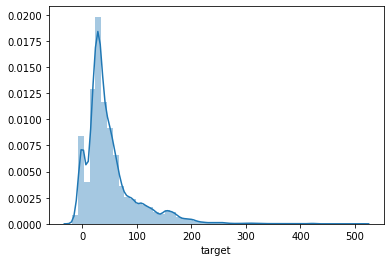

In [233]:
sns.distplot(final_result.target)

In [226]:
final_result.describe()

,target
count,9333.000000
mean,48.559781
std,48.180145
min,0.000000
25%,22.674847
50%,36.036442
75%,60.623871
max,477.248138


In [234]:
final_result['target'] = final_result['target'].apply(above)

In [235]:
final_result[final_result['target']< 0]

,ID,target


In [236]:
def relu(x):
    return x * (x > 0)
final_result['target'] = final_result['target'].transform(relu).transform(np.abs)
final_result['target'] = final_result['target'].astype(float)

In [237]:
final_result.to_csv('first_tunis_air_3_lgbm_15.csv' , index = False)

In [42]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout, BatchNormalization

Using TensorFlow backend.


In [45]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(64, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dropout(0.2))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dropout(0.2))
NN_model.add(Dense(1, kernel_initializer='normal', activation='relu'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                3328      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [46]:
NN_model.fit(x_train, y_train, epochs=50, batch_size=256, validation_split = 0.2)

Train on 60386 samples, validate on 15097 samples
Epoch 1/50
60386/60386 [==============================] - 16s 272us/step - loss: 45.9380 - mean_absolute_error: 45.9380 - val_loss: 619.3739 - val_mean_absolute_error: 619.3739
Epoch 2/50
60386/60386 [==============================] - 4s 70us/step - loss: 42.9346 - mean_absolute_error: 42.9346 - val_loss: 42.1451 - val_mean_absolute_error: 42.1451
Epoch 3/50
60386/60386 [==============================] - 5s 89us/step - loss: 42.4937 - mean_absolute_error: 42.4937 - val_loss: 47.0539 - val_mean_absolute_error: 47.0539
Epoch 4/50
60386/60386 [==============================] - 5s 76us/step - loss: 42.2970 - mean_absolute_error: 42.2970 - val_loss: 168.3640 - val_mean_absolute_error: 168.3640
Epoch 5/50
60386/60386 [==============================] - 4s 73us/step - loss: 42.1908 - mean_absolute_error: 42.1908 - val_loss: 383.7899 - val_mean_absolute_error: 383.789942.0543 
Epoch 6/50
60386/60386 [==============================] - 5s 89us/ste

60386/60386 [==============================] - 4s 60us/step - loss: 41.5897 - mean_absolute_error: 41.5897 - val_loss: 47.0539 - val_mean_absolute_error: 47.0539
Epoch 48/50
60386/60386 [==============================] - 4s 69us/step - loss: 41.5604 - mean_absolute_error: 41.5604 - val_loss: 47.0539 - val_mean_absolute_error: 47.0539
Epoch 49/50
60386/60386 [==============================] - 4s 65us/step - loss: 41.5706 - mean_absolute_error: 41.5706 - val_loss: 43.2700 - val_mean_absolute_error: 43.2700
Epoch 50/50
60386/60386 [==============================] - 4s 61us/step - loss: 41.5382 - mean_absolute_error: 41.5382 - val_loss: 234.8794 - val_mean_absolute_error: 234.8794


In [47]:
NN_model.evaluate(x_test, y_test)

32350/32350 [==============================] - 3s 80us/step


[234.55971640255206, 234.55971640255206]